In [1]:
import numpy as np

In [2]:
from qiskit import *

In [3]:
# On crée un circuit quantique avec gardien 1, gardien 2 et ligne du mensonge

In [4]:
circ = QuantumCircuit(3)

In [5]:
# Affichons le cicruit

In [6]:
circ.draw()

q_0: 
     
q_1: 
     
q_2:

In [7]:
# On met gardien 1 en superposition

In [8]:
circ.h(0)

In [9]:
#On met la ligne du mensonge en superposition

In [10]:
circ.h(2)

In [11]:
#On intrique gardien 1 et gardien 2

In [12]:
circ.cx(0,1)

In [13]:
circ.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
     ┌───┐└───┘
q_2: ┤ H ├─────
     └───┘

In [14]:
#On intrique la ligne du mensonge avec gardien 1 et/ou avec gardien 2

In [15]:
circ.cx(2,1)

In [16]:
circ.x(2)

In [17]:
circ.cx(2,0)

In [18]:
circ.x(2)

In [19]:
circ.draw()

┌───┐               ┌───┐     
q_0: ┤ H ├──■────────────┤ X ├─────
     └───┘┌─┴─┐┌───┐     └─┬─┘     
q_1: ─────┤ X ├┤ X ├───────┼───────
     ┌───┐└───┘└─┬─┘┌───┐  │  ┌───┐
q_2: ┤ H ├───────■──┤ X ├──■──┤ X ├
     └───┘          └───┘     └───┘

In [20]:
#On swap les gardiens pour modéliser la question

In [21]:
circ.swap(0,1)

In [22]:
circ.x(0)

In [23]:
circ.x(1)

In [24]:
circ.draw()

┌───┐               ┌───┐     ┌───┐
q_0: ┤ H ├──■────────────┤ X ├──X──┤ X ├
     └───┘┌─┴─┐┌───┐     └─┬─┘  │  ├───┤
q_1: ─────┤ X ├┤ X ├───────┼────X──┤ X ├
     ┌───┐└───┘└─┬─┘┌───┐  │  ┌───┐└───┘
q_2: ┤ H ├───────■──┤ X ├──■──┤ X ├─────
     └───┘          └───┘     └───┘

In [25]:
#Puis on réapplique le mensonge

In [26]:
circ.cx(2,1)

In [27]:
circ.x(2)

In [28]:
circ.cx(2,0)

In [29]:
circ.x(2)

In [30]:
circ.draw()

┌───┐               ┌───┐     ┌───┐          ┌───┐     
q_0: ┤ H ├──■────────────┤ X ├──X──┤ X ├──────────┤ X ├─────
     └───┘┌─┴─┐┌───┐     └─┬─┘  │  ├───┤┌───┐     └─┬─┘     
q_1: ─────┤ X ├┤ X ├───────┼────X──┤ X ├┤ X ├───────┼───────
     ┌───┐└───┘└─┬─┘┌───┐  │  ┌───┐└───┘└─┬─┘┌───┐  │  ┌───┐
q_2: ┤ H ├───────■──┤ X ├──■──┤ X ├───────■──┤ X ├──■──┤ X ├
     └───┘          └───┘     └───┘          └───┘     └───┘

In [31]:
# Utilisons un simulateur quantique

In [32]:
# Importe Aer = le module des simulateurs

In [33]:
from qiskit import Aer

In [34]:
# On crée notre moteur de calcul

In [35]:
backend = Aer.get_backend('statevector_simulator')

In [36]:
# On lance le calcul quantique

In [37]:
job = backend.run(circ)

In [38]:
# Affichons le résultat

In [39]:
result = job.result()

In [40]:
# On a simplement des vecteurs d'état

In [41]:
outputstate = result.get_statevector(circ,decimals=3)

In [42]:
print(outputstate)

Statevector([0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0.5+0.j, 0. +0.j, 0. +0.j,
             0.5+0.j],
            dims=(2, 2, 2))


In [43]:
# Affichons un histogramme

In [44]:
from qiskit.visualization import plot_state_city

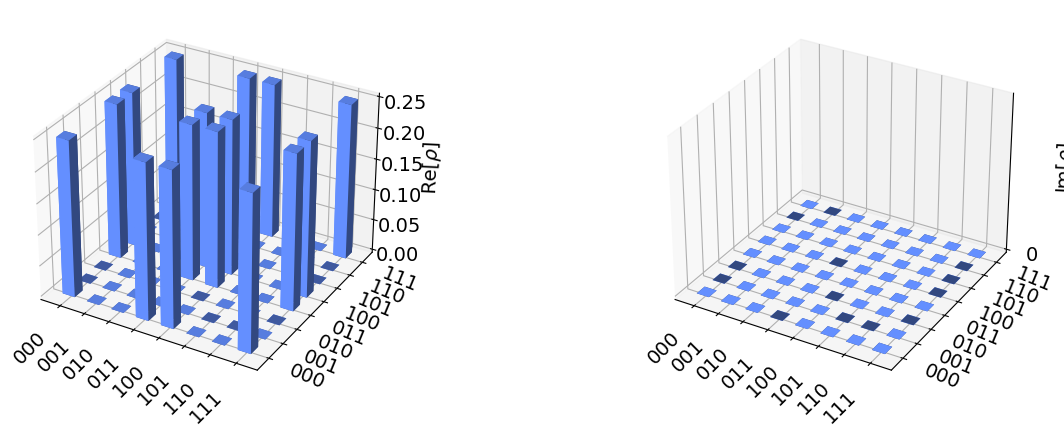

In [45]:
plot_state_city(outputstate)